# The Power of Plots

While your data companions rushed off to jobs in finance and government, you remained adamant that science was the way for you. Staying true to your mission, you've since joined Pymaceuticals Inc., a burgeoning pharmaceutical company based out of San Diego, CA. Pymaceuticals specializes in drug-based, anti-cancer pharmaceuticals. In their most recent efforts, they've since begun screening for potential treatments to squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

As their Chief Data Analyst, you've been given access to the complete data from their most recent animal study. In this study, 250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological responses were then monitored over the course of that time. Your objective is to analyze the data to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.

To do this you are tasked with:

Creating a scatter plot that shows how the tumor volume changes over time for each treatment.

Creating a scatter plot that shows how the number of metastatic (cancer spreading) sites changes over time for each treatment.

Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)

Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.

Include 3 observations about the results of the study. Use the visualizations you generated from the study data as the basis for your observations.

# Pymaceuticals

In [122]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"
 
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug = pd.read_csv(mouse_drug_data_to_load)
clinical_trial = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
merge_data = pd.merge(clinical_trial, mouse_drug, on="Mouse ID",how="left")

# Display the data table for preview
merge_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [123]:
#Select needed data for Analysis and Group by Drug and Timepoint
Data_Volume = merge_data[["Drug","Timepoint","Tumor Volume (mm3)"]]
groupDrugTimeVol = Data_Volume.groupby(["Drug","Timepoint"])

#Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
df_GrpDrugTimeVolMean = groupDrugTimeVol.mean()
df_GrpDrugTimeVolMean = df_GrpDrugTimeVolMean.reset_index()
df_GrpDrugTimeVolMean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [124]:
#Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
df_GrpDrugTimeVolError = groupDrugTimeVol.sem()
df_GrpDrugTimeVolError = df_GrpDrugTimeVolError.reset_index()

# Preview DataFrame
df_GrpDrugTimeVolError.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [125]:
# Minor Data Munging to Re-Format the Data Frames
dfPV_VolMean = df_GrpDrugTimeVolMean.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
dfPV_VolError = df_GrpDrugTimeVolError.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
dfPV_VolMean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


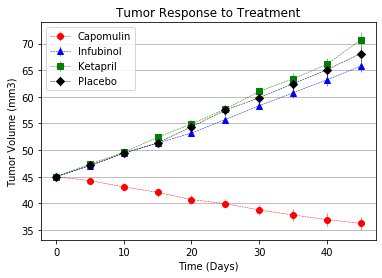

In [126]:
#Store Drugs for comparison in a List to avoid hardcode
DrugsSelected = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
NumberofDrugs = len(DrugsSelected)

x_axis = dfPV_VolMean.index

#Store Plotting properties for errorbar
markers = ["o","^","s","D","d","p","*","x",".","P"]
colors = ["r", "b", "g", "black","y","m","c","pink","yellow","grey"]

# Generate the Plot (with Error Bars)
for x in range(NumberofDrugs):
    plt.errorbar(x_axis, dfPV_VolMean[DrugsSelected[x]], dfPV_VolError[DrugsSelected[x]], label = DrugsSelected[x], 
                 marker=markers[x], color=colors[x], ls = "dashed", lw=0.50)

#Information for the graph
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(axis='y')
plt.legend(loc="best")

#Save graph and show
plt.savefig("TumorVolume.png")
plt.show()

## Metastatic Response to Treatment

In [127]:
#Select needed data for Analysis and Group by Drug and Timepoint
Data_Metastatic = merge_data[["Drug","Timepoint","Metastatic Sites"]]
groupDrugTimeMeta = Data_Metastatic.groupby(["Drug","Timepoint"])

#Store the Mean Met. Site Data Grouped by Drug and Timepoint 
df_GrpDrugTimeMetaMean = groupDrugTimeMeta.mean()
df_GrpDrugTimeMetaMean = df_GrpDrugTimeMetaMean.reset_index()

# Convert to DataFrame

# Preview DataFrame
df_GrpDrugTimeMetaMean.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [128]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
df_GrpDrugTimeMetaError = groupDrugTimeMeta.sem()
df_GrpDrugTimeMetaError = df_GrpDrugTimeMetaError.reset_index()
# Convert to DataFrame

# Preview DataFrame
df_GrpDrugTimeMetaError.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [129]:
# Minor Data Munging to Re-Format the Data Frames
dfPV_MetaMean = df_GrpDrugTimeMetaMean.pivot(index='Timepoint', columns='Drug', values="Metastatic Sites")
dfPV_MetaError = df_GrpDrugTimeMetaError.pivot(index='Timepoint', columns='Drug', values="Metastatic Sites")

# Preview that Reformatting worked
dfPV_MetaMean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


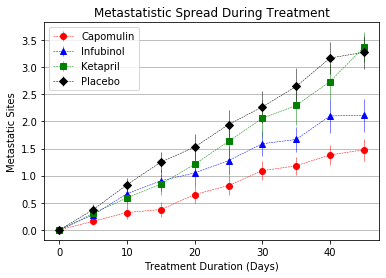

In [151]:
# Generate the Plot (with Error Bars)
x_axis = dfPV_MetaMean.index

for x in range(NumberofDrugs):
    plt.errorbar(x_axis, dfPV_MetaMean[DrugsSelected[x]], yerr = dfPV_MetaError[DrugsSelected[x]], label = DrugsSelected[x], 
                 marker=markers[x], color=colors[x], ls = "dashed", lw=0.50)

#Information for the graph
plt.title("Metastatistic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Metastatic Sites")
plt.grid(axis='y')
plt.legend(loc="best")
# Save the Figure
plt.savefig("MetaSpread.png")
# Show the Figure
plt.show()

## Survival Rates

In [131]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
Data_Mouse = merge_data[["Drug","Timepoint","Mouse ID"]]
groupDrugTimeMouse = Data_Mouse.groupby(["Drug","Timepoint"])

df_GrpDrugTimeMouseCount = groupDrugTimeMouse.count()
df_GrpDrugTimeMouseCount = df_GrpDrugTimeMouseCount.reset_index()
df_GrpDrugTimeMouseCount.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [132]:
# Minor Data Munging to Re-Format the Data Frames
dfPV_MouseCount = df_GrpDrugTimeMouseCount.pivot(index='Timepoint', columns='Drug', values="Mouse ID")

# Preview the Data Frame
dfPV_MouseCount 

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


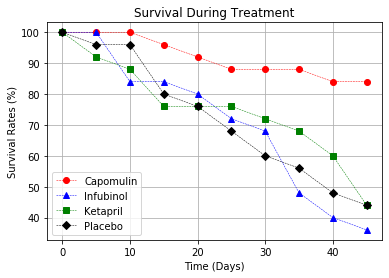

In [133]:
#Calculate the Percent compared to first value
dfPV_MouseCountPercent = dfPV_MouseCount/dfPV_MouseCount.iloc[0,:] * 100

# Generate the Plot (with Error Bars)
x_axis = dfPV_MouseCountPercent.index

for x in range(NumberofDrugs):
    plt.plot(x_axis, dfPV_MouseCountPercent[DrugsSelected[x]], label = DrugsSelected[x], 
                 marker=markers[x], color=colors[x], ls = "dashed", lw=0.50)

#Information for the graph
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rates (%)")
plt.grid()
plt.legend(loc="best")

# Save the Figure
plt.savefig("Survival.png")
plt.show()

## Summary Bar Graph

In [134]:
# Calculate the percent changes for each drug
AllVolMeanChange = (dfPV_VolMean.iloc[-1,:] - dfPV_VolMean.iloc[0,:]) / dfPV_VolMean.iloc[0,:] *100

# Display the data to confirm
AllVolMeanChange

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

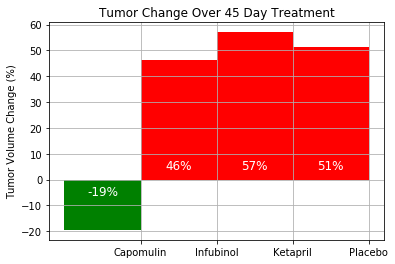

In [150]:
#Select needed data for Analysis
df_VolMeanChangeSelected = dfPV_VolMean[DrugsSelected]

# Calculate the percent changes for drugs selected
SelectedVolMeanChange = (df_VolMeanChangeSelected.iloc[-1,:] - df_VolMeanChangeSelected.iloc[0,:]) / df_VolMeanChangeSelected.iloc[0,:] *100

# Store all Relevant Percent Changes into a Tuple
PercentChange = tuple(zip(SelectedVolMeanChange.index,SelectedVolMeanChange))

# Splice the data between passing and failing drugs
PassingDrugs = []
FailingDrugs = []
for x in range(NumberofDrugs):
    if PercentChange[x][1] < 0:
        PassingDrugs.append(PercentChange[x])
    else:
        FailingDrugs.append(PercentChange[x])

#Preparing axis and values for barPlot
PassAxis = [i[0] for i in PassingDrugs]
PassValue = [i[1] for i in PassingDrugs]
FailAxis = [i[0] for i in FailingDrugs]
FailValue = [i[1] for i in FailingDrugs]
        
fig, ax = plt.subplots()
rects1 = ax.bar(PassAxis, PassValue, color='g', align='edge', width = -1)
rects2 = ax.bar(FailAxis, FailValue, color='r', align='edge', width = -1)

# Orient widths. Add labels, tick marks, etc. 
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_ylabel('Tumor Volume Change (%)')
plt.grid()

# Use functions to label the percentages of changes
def autolabel(rects,y):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        texttoprint = str(int(height))+"%"
        ax.text(rect.get_x() + rect.get_width()/2, y, texttoprint, 
                ha='center', va='bottom', color='white', fontsize=12)

# Call functions to implement the function calls
autolabel(rects1,-7)
autolabel(rects2,3)

# Save the Figure
plt.savefig("TumorVolumeChange.png")

# Show the Figure
fig.show()

# Conclusions

Based on above charts, conclusions are as follows:

1 Capomulin outperforms other drugs compared, which are Infubinol, Ketapril and Placebo

2 Capomulin is the only one which can reduce the Tumor volume within 45 day, while others increase it

3 From metastatic point of view, again Capomulin has the least meastatic spread less than 2 while compared to other drugs which have more than 2 after 45 days experiment

4 Capumolin has highest survival rate, where is 85% of mice survived the experiment. One thing to note that after the 30th day, Infubinol drop the survival rate by more than 20% and became the lowest at the end of the experiment

5 When comparing Tumor Volume between the end and start of the experiment, Capomulin can reduce by 19%, while others can increase by 40-60%

6 Next comparison should be done betwen Capomulin and Ramicane to know which drug is more effective for the treatment